# Object Detection For Autonomous Driving

## Objective

The goal of this assignment is to fine-tune the YOLO object detection model on a subset of the KITTI dataset, widely used in autonomous driving research. The KITTI dataset provides annotated images for tasks like object detection, tracking, and segmentation, making it ideal for training models to detect objects such as cars, pedestrians, and cyclists.

By completing this assignment, you will gain hands-on experience in dataset preparation, annotation conversion, model training, and performance evaluation using metrics like mAP (mean Average Precision). Additionally, you will explore the trade-offs between speed and accuracy, crucial for real-time applications like autonomous driving.


## Introduction: Object Detection

Object detection is a fundamental task in computer vision that involves identifying and localizing objects within an image or video. 

The main techniques for object detection include traditional methods like sliding window and region-based approaches, as well as modern deep learning-based methods such as YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector), and Faster R-CNN. These techniques leverage convolutional neural networks (CNNs) to extract features and predict bounding boxes and class labels for objects in real-time or near real-time. 

Widely used models for object detection include:
- **YOLO (You Only Look Once)**: Known for its speed and efficiency in real-time applications.
- **Faster R-CNN**: A two-stage detector that provides high accuracy but is slower compared to single-stage detectors.
- **SSD (Single Shot MultiBox Detector)**: Balances speed and accuracy, making it suitable for various applications.
- **RetinaNet**: Introduces the focal loss to address class imbalance in object detection.
- **EfficientDet**: A family of models that optimize both accuracy and efficiency using compound scaling.

In the context of autonomous vehicles, object detection plays a critical role in perceiving the environment, identifying obstacles, pedestrians, traffic signs, and other vehicles. This capability enables autonomous systems to make informed decisions, ensuring safety and efficiency in navigation and driving scenarios.

## YOLO

YOLO (You Only Look Once) is a state-of-the-art, real-time object detection system. Unlike traditional object detection methods that apply a classifier to different regions of an image, YOLO frames object detection as a single regression problem. It predicts bounding boxes and class probabilities directly from full images in one evaluation, making it extremely fast and efficient.

### Model

The YOLO model divides the input image into a grid, where each grid cell is responsible for predicting bounding boxes and their associated class probabilities. Key features of YOLO include:

- **Unified Architecture**: YOLO uses a single convolutional neural network (CNN) to predict multiple bounding boxes and class probabilities simultaneously.
- **Speed**: YOLO is optimized for real-time applications, capable of processing images at high frame rates.
- **Global Context**: By considering the entire image during training and inference, YOLO reduces false positives and improves detection accuracy.
- **Versions**: Over time, YOLO has evolved through multiple versions (e.g., YOLOv1 up to YOLOv11), each introducing architectural improvements, better loss functions, and enhanced performance.

YOLO is widely used in applications such as autonomous driving, surveillance, and robotics, where real-time object detection is critical.

For more details on YOLO, visit the [Ultralytics GitHub repository](https://github.com/ultralytics/ultralytics).

## Theory Questions


For the next questions, focus on the latest version of the model, YOLOv11

Briefly describe the architecture used in YOLOv11 and the different losses used during training.

ANS:

The following [picture](https://medium.com/@nikhil-rao-20/yolov11-explained-next-level-object-detection-with-enhanced-speed-and-accuracy-2dbe2d376f71) summarize the architecture of the YOLOv11

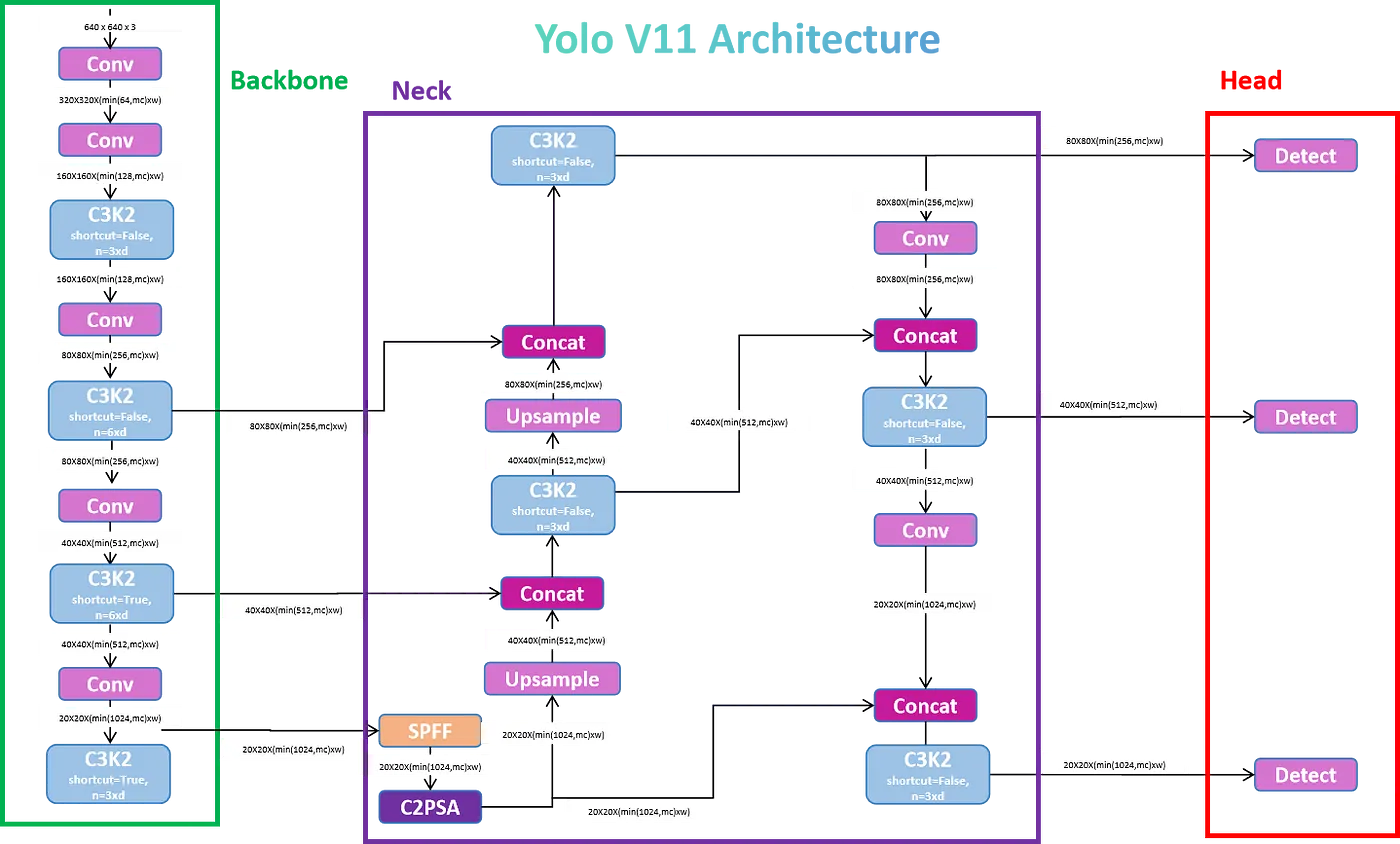

As it can be seen in the figure, there are three main sections that compose the architecture of the YOLOv11: the **Backbone**, the **Neck** and the **Head**.

The **Backbone** is the first section of the YOLOv11 and it is responsible for extracting features from the input images at *multiple scales*, an ability that previous versions of the model struggled with.

Following the official documentation, this new model is capable of a enhanced feature extraction (due to the change in the architecture of the backbone and neck stages), optimized speed efficiency, grater accuracy (with fewer parameters), supports a broad range of tasks and it is compatible with edge devices.

There are two main blocks inside the Backbone section: the *Conv Block* and the *C3K2 block*. The first one, *Conv Block* is a simple 2D convolutional layer, followed by a *Batch Normalization* and a *SiLU* activation function.
But at the heart of the Backbone stage, there is the *C3K2* block, that optimize the flow of information through the network by splitting the feature map and applying a series of smaller kernel convolution (which are faster computationally but still accurate). Furthermore, inside this block some skipping connections are present, which allows the model to learn in a better way, very similarly to the ResNet architecture.

Inside the Neck stage, instead, we find, in addition to some already described blocks, two new important block: the *SPFF Block* and the *C2PSA Block*.
The SPFF (Spatial Pyramid Pooling Fast) was designed to pool features from different regions of an image at varying scales. This allows the model to perform better in detecting small object. The idea behind this module is to combine the information extracted from the images at different resolution, using multiple max-pooling operations.

The most significant innovation in YOLOv11 is, after all, the C2PSA block (Cross Stage Partial with Spatial Attention), that allows the model to focus more on the important parts of the image, still by maintaining a balance between computational cost and detection accuracy. To identify this *regions of interest* this block apply spatial attention over the extracted features, potentially improving the detection accuracy for objects of varying sizes and positions.

The Head section of the YOLOv11 is responsible for generating the final predition in terms of object detection and classification. It outputs the detection boxes for three levels of granularity in the image, usign the feature maps generated by the backbone and neck.
Inside the Head section we find different blocks, like the C3k2, the Conv block and the some final convolutional layers and Detect layer, that reduce the feature to the required number of outputs for bounding box, object score (to indicate the presence of objects or not) coordinates and class predictions.

During training, 3 main losses are used:
- Box Loss
- Class Loss
- Distribution Focal Loss (DFL)

The Box Loss is a type of loss that help to measure how well the predicted boxed match the ground truth. Following the [Losses Documentation](https://docs.ultralytics.com/reference/utils/loss/#ultralytics.utils.loss.DFLoss.__call__) it computes some shade of the IoU (Intersection over Union) and the DFL (Distribution Focal Loss) losses for bounding boxes.

Regarding the Class Loss measure the difference between the predicted class probabilities and the ground trith label for each detected object. In previous model this was implemented using Binary Cross Entropy Loss, but in the latest versions (e.g. YOLOv11), this is probably implemented with Focal Loss to address class imbalance.

The Distribution Focal Loss, is a refinement loss used to improve the bounding box regression accuracy, allowing the network to model it as a distribution over discrete bins, capturing uncertainty and improving localization.

This losses are then combined inot a total loss function that is used to train the model.

Sources:
- [YOLOv11 Architecture Explained: Next-Level Object Detection with Enhanced Speed and Accuracy](https://medium.com/@nikhil-rao-20/yolov11-explained-next-level-object-detection-with-enhanced-speed-and-accuracy-2dbe2d376f71)
- [YOLOV11: AN OVERVIEW OF THE KEY ARCHITECTURAL ENHANCEMENTS](https://arxiv.org/pdf/2410.17725)
- [YOLOv11 Official Documentation](https://docs.ultralytics.com/models/yolo11/#performance-metrics)
- [YOLO Loss Function Part 1: SIoU and Focal Loss](https://learnopencv.com/yolo-loss-function-siou-focal-loss/)

What are the metrics used to assess YOLO's performance for object detection?

ANS:

The main metric used to assess YOLO's performance for object detection is the *Mean Average Precision*, that looks at the precision of detecting each object, average these scores and gives an overall number that shows how accurately the model can identify and classify objects. When fine-tuning a model two shades of this metric are present: the mAP50 and the mAP50-95. 

The first one, mAP50, measures the average precision at a single IoU (Intersection over Union) -- that measures the overlap between predicted and ground truth bounding boxes, giving the quality of an individaul prediction -- threshold of 0.5. Here the goal is just to see if the model is generally good at spotting objects and so it does just focus on whether the obkect is roughly in the right place. The second one, mAP50-95, instead, averages the mAP values calculated at multiple IoU thresholds, from 0.5 to 0.95. This gives a more accurate score on if the model can find object at different level of strictness.

In a good trained model, both of these score must be as close to one.

Other interesting metrics to evaluate the performances are the *Precision* (P) and *Recall* (R), that measures respectively how many predicted objects are actually correct, and how many actual objects were actually correctly detected. 
$$
P = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \qquad R = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

Other quality that can be used more for comparing different models than the actual performances are the FPS (Frames Per Second), to measure the speed of the model, and the *Parameter Count and FLOPs*, to measure the computational cost of the model. This last metric plays a crucial role when there is the need to put the model on an edge device.

Sources:
- [Insights on Model Evaluation and Fine-Tuning](https://docs.ultralytics.com/guides/model-evaluation-insights/)
- [YOLOv11 Architecture Explained: Next-Level Object Detection with Enhanced Speed and Accuracy](https://medium.com/@nikhil-rao-20/yolov11-explained-next-level-object-detection-with-enhanced-speed-and-accuracy-2dbe2d376f71)

## Code

In the next part of the assignment, you will load a YOLO model and fine-tune it on the provided subset of the KITTI dataset.
You will then visualize the training losses and evaluate the model by running inference to assess its performance.

In [7]:
# !pip install ultralytics opencv-python-headless -q

In [2]:
import os, cv2, glob, random, shutil, requests, zipfile
from ultralytics import YOLO

import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

from IPython.display import Image, display
import glob 

import yaml
import cv2
import matplotlib.pyplot as plt
import glob

In [5]:
# ---------------------------------------------
# STEP 1: Setup paths
# ---------------------------------------------
HOME = os.getcwd()
DATASET_PATH = os.path.join(HOME, "datasets", "kitti_subset")
IMAGES_PATH = os.path.join(DATASET_PATH, "images")
LABELS_PATH = os.path.join(DATASET_PATH, "labels")

TRAIN_IMG = os.path.join(IMAGES_PATH, "train")
VAL_IMG = os.path.join(IMAGES_PATH, "val")
TEST_IMG = os.path.join(IMAGES_PATH, "test")
TRAIN_LABEL = os.path.join(LABELS_PATH, "train")
VAL_LABEL = os.path.join(LABELS_PATH, "val")
TEST_LABEL = os.path.join(LABELS_PATH, "test")

for path in [TRAIN_IMG, VAL_IMG, TEST_IMG, TRAIN_LABEL, VAL_LABEL, TEST_LABEL]:
    os.makedirs(path, exist_ok=True)

# ---------------------------------------------
# STEP 2: Download and extract KITTI data
# ---------------------------------------------
KITTI_URL = "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_image_2.zip"
KITTI_LABELS_URL = "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_object_label_2.zip"

def download_and_extract(url, extract_to):
    zip_path = os.path.join(HOME, url.split("/")[-1])
    if not os.path.exists(zip_path):
        print(f"Downloading {url}...")
        response = requests.get(url, stream=True)
        with open(zip_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    file.write(chunk)
        print("Download complete.")

    print(f"Extracting {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete.")

download_and_extract(KITTI_URL, IMAGES_PATH)
download_and_extract(KITTI_LABELS_URL, LABELS_PATH)

# ---------------------------------------------
# STEP 3: Convert KITTI annotations to YOLO
# ---------------------------------------------
CLASS_MAP = {"Car": 0, "Pedestrian": 1, "Cyclist": 2}

def convert_kitti_to_yolo(kitti_label_path, yolo_label_path, image_path):
    with open(kitti_label_path, "r") as file:
        lines = file.readlines()

    img = cv2.imread(image_path)
    if img is None:
        return
    height, width, _ = img.shape

    with open(yolo_label_path, "w") as yolo_file:
        for line in lines:
            elements = line.split()
            class_name = elements[0]
            if class_name not in CLASS_MAP:
                continue  # Skip irrelevant classes

            class_id = CLASS_MAP[class_name]
            x1, y1, x2, y2 = map(float, elements[4:8])

            # Convert to YOLO format
            center_x = ((x1 + x2) / 2) / width
            center_y = ((y1 + y2) / 2) / height
            bbox_width = (x2 - x1) / width
            bbox_height = (y2 - y1) / height

            yolo_file.write(f"{class_id} {center_x:.6f} {center_y:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# ---------------------------------------------
# STEP 4: Prepare dataset (subset, split, convert)
# ---------------------------------------------
all_images = sorted(glob.glob(os.path.join(IMAGES_PATH, "training", "image_2", "*.png")))
all_labels = sorted(glob.glob(os.path.join(LABELS_PATH, "training", "label_2", "*.txt")))

paired_data = list(zip(all_images, all_labels))
random.seed(42)
random.shuffle(paired_data)

# Keep small subset (e.g., 300 images total)
subset_data = paired_data[:300]
train_size = int(0.8 * len(subset_data))
val_size = int(0.1 * len(subset_data))

train_data = subset_data[:train_size]
val_data = subset_data[train_size:train_size + val_size]
test_data = subset_data[train_size + val_size:]

def move_and_convert_files(data, img_dest, lbl_dest):
    for img_path, lbl_path in data:
        new_img_path = os.path.join(img_dest, os.path.basename(img_path))
        new_lbl_path = os.path.join(lbl_dest, os.path.basename(lbl_path))
        shutil.copy2(img_path, new_img_path)
        convert_kitti_to_yolo(lbl_path, new_lbl_path, new_img_path)

move_and_convert_files(train_data, TRAIN_IMG, TRAIN_LABEL)
move_and_convert_files(val_data, VAL_IMG, VAL_LABEL)
move_and_convert_files(test_data, TEST_IMG, TEST_LABEL)


# ---------------------------------------------
# STEP 5: Create data.yaml
# ---------------------------------------------
data_yaml = f"""
path: {DATASET_PATH}
train: images/train
val: images/val
test: images/test

nc: 3
names: ['Car', 'Pedestrian', 'Cyclist']
"""

with open(os.path.join(DATASET_PATH, "data.yaml"), "w") as f:
    f.write(data_yaml)



Extracting /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/data_object_image_2.zip...
Extraction complete.
Extracting /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/data_object_label_2.zip...
Extraction complete.


## Fine Tuning Strategy
I'll proceed by running different tests with different parameters (lr, data augmentation, optimizer, ...) on a reduced number of epochs (20). Then I will compare the confusion matrix and mAP scores and losses curves.

## Basic Model
Let's start by fine-tuning the `yolo11m.pt` model, one of the YOLOv11 pretrained models.

First this first test we can try to keep all the default settings.

In [7]:
def plot_results(run_folder):
    """
    Plot training metrics and show the normalized confusion matrix from a YOLO run folder.
    
    Parameters:
    - run_folder (str): Path to the YOLO training run folder (e.g., "runs/detect/train").
    """
    results_path = os.path.join(run_folder, "results.csv")
    cm_path = os.path.join(run_folder, "confusion_matrix_normalized.png")
    
    if not os.path.exists(results_path):
        raise FileNotFoundError(f"results.csv not found in {run_folder}")
    
    results = pd.read_csv(results_path)

    rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle(f"YOLO Training Summary - {str(run_folder).split('/')[-1]}", fontsize=20, weight='bold')

    # GridSpec for custom layout
    gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 2.5])
    axs = [
        fig.add_subplot(gs[0, 0]),     # mAP
        fig.add_subplot(gs[0, 1]),     # Precision & Recall
        fig.add_subplot(gs[1, 0:2]),   # Losses
        fig.add_subplot(gs[:, 2])      # Confusion Matrix (larger column now)
    ]

    # mAP metrics
    axs[0].plot(results["epoch"], results["metrics/mAP50(B)"], label="mAP@0.5", marker="o")
    axs[0].plot(results["epoch"], results["metrics/mAP50-95(B)"], label="mAP@0.5:0.95", marker="s")
    axs[0].set_title("Mean Average Precision")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("mAP")
    axs[0].grid(True)
    axs[0].legend()

    # Precision and Recall
    axs[1].plot(results["epoch"], results["metrics/precision(B)"], label="Precision", marker="o")
    axs[1].plot(results["epoch"], results["metrics/recall(B)"], label="Recall", marker="s")
    axs[1].set_title("Precision & Recall")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Score")
    axs[1].grid(True)
    axs[1].legend()

    # Losses with consistent colors and linestyles
    loss_types = ['box_loss', 'cls_loss', 'dfl_loss']
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    labels = ['Box Loss', 'Class Loss', 'DFL Loss']
    for i, loss in enumerate(loss_types):
        axs[2].plot(results["epoch"], results[f"train/{loss}"], label=f"Train - {labels[i]}", color=colors[i], linestyle='-')
        axs[2].plot(results["epoch"], results[f"val/{loss}"], label=f"Val - {labels[i]}", color=colors[i], linestyle='--')
    axs[2].set_title("Losses")
    axs[2].set_xlabel("Epoch")
    axs[2].set_ylabel("Loss")
    axs[2].grid(True)
    axs[2].legend()

    # Confusion Matrix
    if os.path.exists(cm_path):
        img = mpimg.imread(cm_path)
        axs[3].imshow(img)
        axs[3].axis("off")
        axs[3].set_title("Normalized Confusion Matrix", fontsize=14)
    else:
        axs[3].axis("off")
        axs[3].text(0.5, 0.5, "No confusion matrix found.", ha='center', va='center', fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [11]:
# ---------------------------------------------
# STEP 6: Fine-tune YOLOv11 model
# ---------------------------------------------
#TO-DO: Add the code to fine-tune the YOLOv5 model

# Let's start by importing the basic model
EPOCHS = 20

model_basic = YOLO("yolo11m.pt")

results_basic = model_basic.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,
    batch=12,
    imgsz=640,
    project=os.path.join(HOME, "runs"),
    name="model_basic",
    exist_ok=True,
)


New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=model_basic, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.42G      1.436      2.126      1.117        139        640: 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.44it/s]

                   all         30        128      0.494        0.6      0.527      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.48G      1.355      1.119      1.136        174        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all         30        128      0.497      0.431       0.46      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.48G      1.396      1.103      1.156        103        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.44it/s]

                   all         30        128       0.34      0.508      0.408      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.49G      1.419      1.086      1.165        142        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.19it/s]

                   all         30        128      0.482      0.503      0.469      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.49G      1.391      1.079      1.165         91        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.87it/s]

                   all         30        128      0.307      0.528      0.481      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.49G      1.359      1.044      1.149        118        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.19it/s]

                   all         30        128      0.572      0.607      0.597      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.49G      1.283     0.9271      1.124        137        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.26it/s]

                   all         30        128      0.545      0.644      0.621      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.49G       1.29     0.9273      1.131        136        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.06it/s]

                   all         30        128      0.668      0.593      0.616      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.49G      1.294      0.944      1.111        138        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all         30        128      0.649      0.641      0.608      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.55G      1.239     0.8835      1.094         98        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.22it/s]

                   all         30        128      0.799      0.522      0.601      0.347


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.55G      1.253     0.9878      1.105         56        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all         30        128      0.816      0.601      0.632      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.55G      1.228      0.904      1.111         53        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all         30        128      0.803      0.643      0.635      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.55G      1.195     0.8345      1.082         80        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.00it/s]

                   all         30        128      0.904      0.569      0.634      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.55G      1.185     0.8309      1.083         68        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.50it/s]

                   all         30        128      0.808      0.564      0.647      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.55G      1.118     0.7687      1.055         54        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.09it/s]

                   all         30        128      0.832      0.586      0.648      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.55G      1.108     0.7372       1.04         70        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.12it/s]

                   all         30        128      0.867      0.574      0.679      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.55G      1.096     0.7368      1.035         45        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.40it/s]

                   all         30        128      0.871      0.575      0.689      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.55G      1.077     0.7263      1.029         70        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.25it/s]

                   all         30        128      0.798      0.608      0.706      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.55G      1.053     0.7001      1.014         62        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.36it/s]

                   all         30        128      0.824      0.626       0.68      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.55G      1.004     0.6646      1.001         59        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.86it/s]

                   all         30        128      0.882      0.611      0.693      0.459



20 epochs completed in 0.036 hours.
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic/weights/last.pt, 40.5MB
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic/weights/best.pt, 40.5MB

Validating /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.70it/s]


                   all         30        128      0.799      0.608      0.706      0.467
                   Car         26        108      0.908      0.824        0.9       0.64
            Pedestrian          7         16      0.873        0.5      0.639      0.401
               Cyclist          3          4      0.616        0.5      0.578       0.36
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_basic


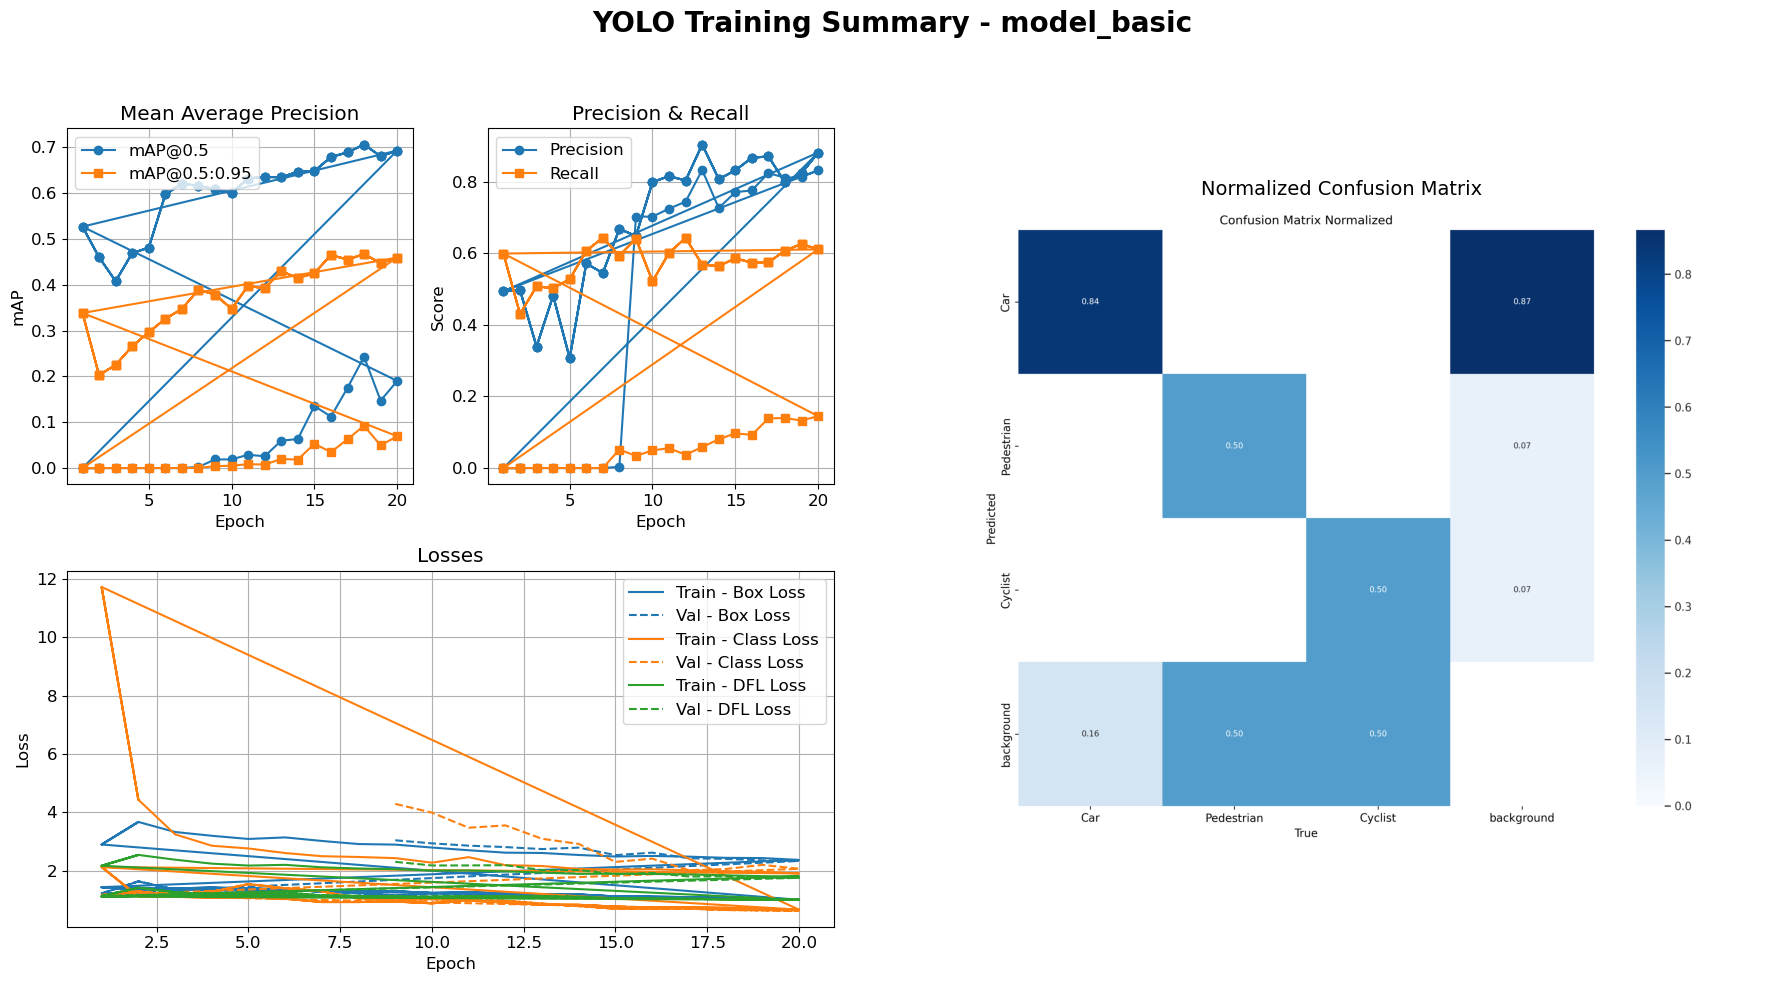

In [12]:
plot_results(results_basic.save_dir)

Ok, for sure with more epochs the results will be better, but let's try something else, for example changing the optimizer. By looking at the logs I found out that the used optimizer is the AdamW. Let's try with "standard" ADAM and fix the learning rate to 1e-2

In [13]:
model_adam = YOLO("yolo11m.pt")

results_adam = model_adam.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,
    batch=12,
    optimizer="adam",
    lr0=0.01,
    imgsz=640,
    project=os.path.join(HOME, "runs"),
    name="model_adam",
    exist_ok=True,
)

New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=model_adam, exist_ok=True, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.42G      2.897      11.72       2.17        139        640: 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.31it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.49G       3.67      4.431      2.541        174        640: 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.81it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.55G      3.326      3.246      2.377        103        640: 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.85it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.55G      3.196      2.855      2.242        142        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.73it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.55G      3.088      2.762      2.176         91        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.54it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.61G       3.14      2.605      2.201        118        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.67it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.61G      3.019      2.497      2.116        137        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 19.15it/s]

                   all         30        128          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.62G      2.913       2.47      2.076        136        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.57it/s]

                   all         30        128    0.00349     0.0517    0.00238   0.000312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.62G      2.894      2.431      2.053        138        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.00it/s]

                   all         30        128      0.703      0.034     0.0187    0.00407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.62G      2.793      2.275      2.004         98        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.10it/s]

                   all         30        128      0.703     0.0494     0.0189    0.00512


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.62G        2.7      2.464      2.006         56        640: 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.53it/s]

                   all         30        128      0.725     0.0556      0.029    0.00844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.62G      2.618       2.19      1.977         53        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.26it/s]

                   all         30        128      0.745      0.037     0.0257    0.00763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.62G      2.607       2.16      1.937         80        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all         30        128      0.833     0.0586     0.0596     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.62G      2.538       2.06      1.891         68        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all         30        128      0.727     0.0802     0.0634     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.62G      2.486       2.04      1.897         54        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.10it/s]

                   all         30        128      0.771     0.0971      0.135     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.68G      2.506      2.047       1.89         70        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.38it/s]

                   all         30        128      0.776     0.0926      0.112     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.77G      2.481      2.015      1.871         45        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

                   all         30        128      0.825      0.139      0.175     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.81G      2.441      1.982      1.843         70        640: 100%|██████████| 20/20 [00:05<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.03it/s]

                   all         30        128      0.811       0.14      0.243     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.81G      2.432      1.964      1.813         62        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.01it/s]

                   all         30        128      0.813      0.133      0.147     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.81G      2.369      1.907      1.802         59        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.27it/s]

                   all         30        128      0.832      0.145       0.19     0.0694



20 epochs completed in 0.036 hours.
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam/weights/last.pt, 40.5MB
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam/weights/best.pt, 40.5MB

Validating /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.09it/s]


                   all         30        128       0.81      0.139      0.243     0.0923
                   Car         26        108      0.431      0.417      0.389       0.16
            Pedestrian          7         16          1          0     0.0901     0.0175
               Cyclist          3          4          1          0      0.249     0.0997
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_adam


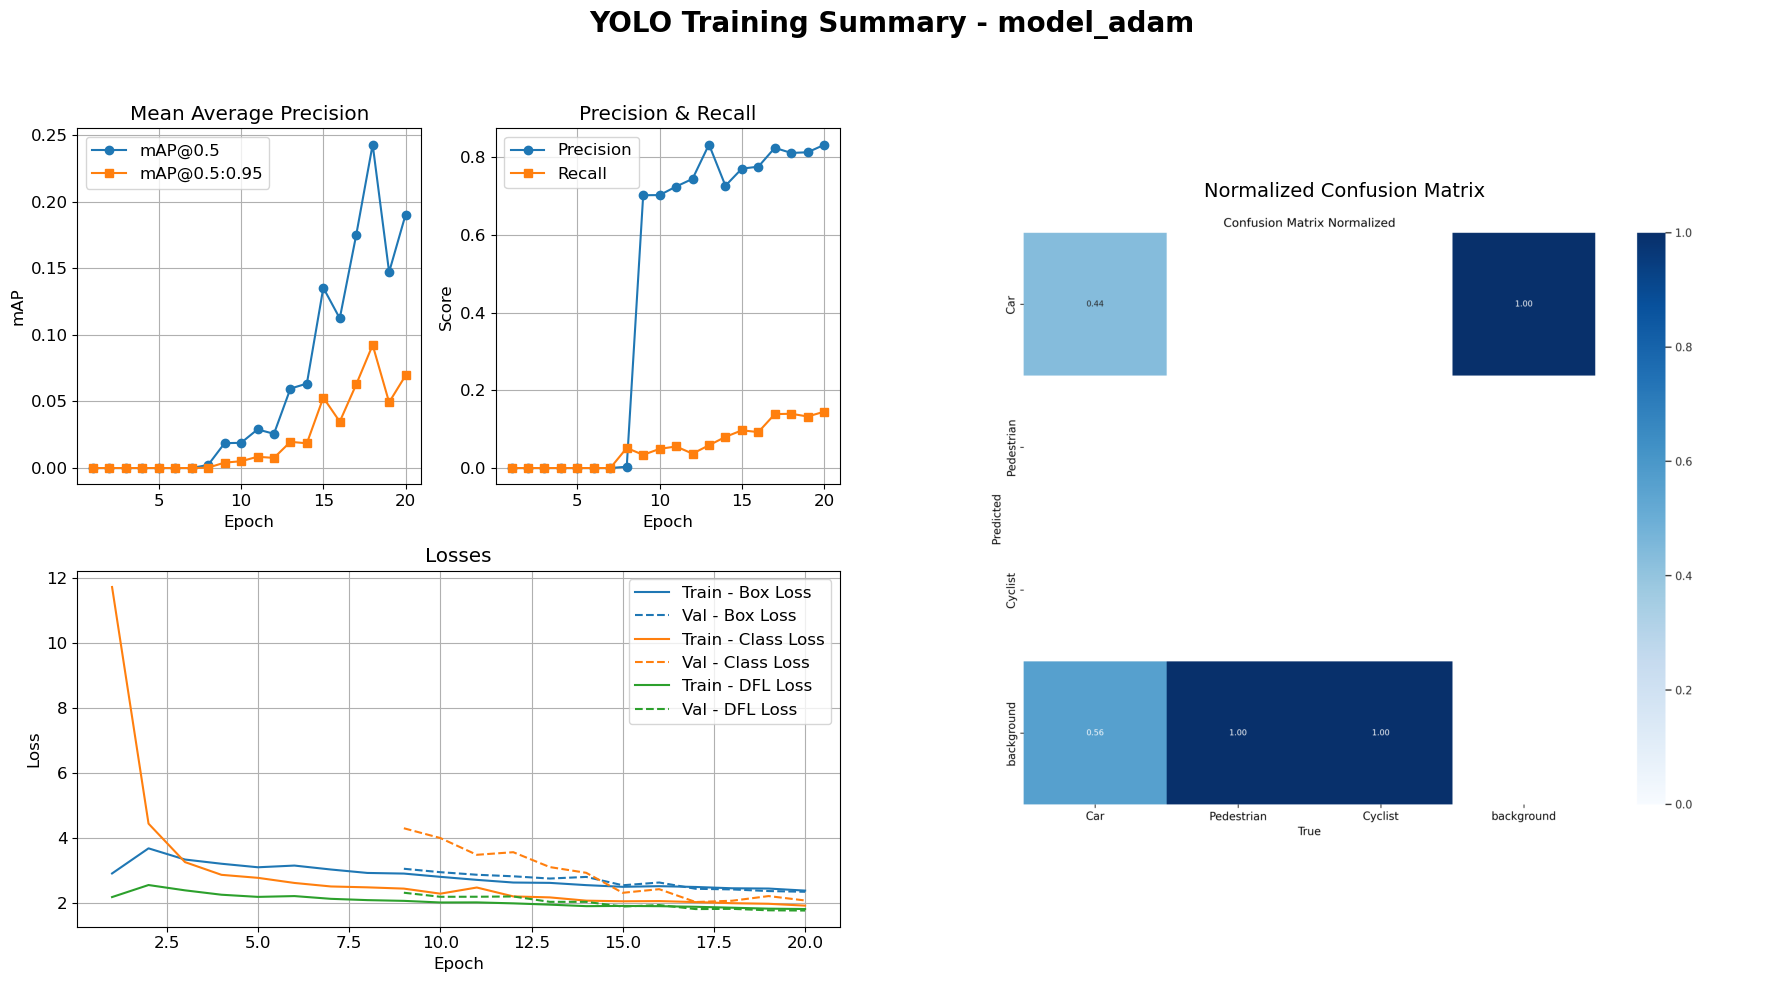

In [14]:
plot_results(results_adam.save_dir)

Ok, the results are not good with this combination of optimizer and learning rate, but probably with more epochs they will improve (we can see a slightly improve in the last epochs).

For the next test I'll try to boost a little bit the data augmentation, while keeping all the other parameters the same

In [19]:
model_dataAug = YOLO("yolo11m.pt")

results_dataAug = model_dataAug.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,
    batch=12,

    # data augmentation parameters
    hsv_h=0.1,
    hsv_s=0.9,
    hsv_v=0.5,
    perspective=0.001,
    mixup=0.2,
    translate=0.2,
    degrees=10,
    
    imgsz=640,
    project=os.path.join(HOME, "runs"),
    name="model_dataAug",
    exist_ok=True,
)

New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=model_dataAug, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, ha

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.81G      1.851      2.312      1.379        177        640: 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.79it/s]

                   all         30        128      0.505      0.478      0.444       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.88G      1.692      1.509      1.335        144        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.50it/s]

                   all         30        128      0.337      0.522      0.442      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.91G      1.669      1.478      1.351        146        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.98it/s]

                   all         30        128      0.489      0.363      0.415      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.95G      1.743      1.383      1.369        139        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.91it/s]

                   all         30        128      0.808       0.34      0.468      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.96G      1.747      1.356      1.386        113        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.74it/s]

                   all         30        128      0.786      0.279      0.294       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.97G      1.773      1.345      1.406        167        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.81it/s]

                   all         30        128      0.831      0.385      0.505      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.95G      1.635      1.216      1.318         98        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.09it/s]

                   all         30        128      0.474      0.695      0.584      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.95G      1.641      1.279      1.336        199        640: 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.86it/s]

                   all         30        128      0.694      0.542      0.578      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.95G      1.637      1.241      1.353        125        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.04it/s]

                   all         30        128      0.796      0.405      0.445      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.93G      1.624      1.175      1.322        152        640: 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.97it/s]

                   all         30        128      0.637      0.514      0.558      0.302


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.99G      1.502      1.182      1.249         55        640: 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.87it/s]

                   all         30        128       0.74      0.598      0.592      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.96G      1.456      1.023      1.245         51        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.22it/s]

                   all         30        128      0.781      0.535      0.596      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.95G      1.398     0.9829      1.209         79        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.49it/s]

                   all         30        128      0.746      0.503      0.606      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.97G      1.449      1.007      1.241         66        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.27it/s]

                   all         30        128      0.618      0.531      0.587       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.96G      1.446     0.9658      1.257         54        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.96it/s]

                   all         30        128      0.857       0.63      0.664      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.95G      1.373     0.9055      1.197         70        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.11it/s]

                   all         30        128      0.761      0.531      0.617      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.96G      1.345     0.9029      1.195         44        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all         30        128      0.748      0.587      0.653      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.94G      1.313     0.8724      1.167         67        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.38it/s]

                   all         30        128      0.933      0.558      0.675      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.92G      1.288     0.8453      1.142         60        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.33it/s]

                   all         30        128      0.791      0.581      0.671      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.97G      1.258     0.8104      1.141         56        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all         30        128      0.787        0.6      0.676      0.371



20 epochs completed in 0.038 hours.
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug/weights/last.pt, 40.5MB
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug/weights/best.pt, 40.5MB

Validating /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.61it/s]


                   all         30        128      0.791      0.581      0.673      0.382
                   Car         26        108      0.908      0.806      0.871      0.541
            Pedestrian          7         16      0.803      0.438      0.635      0.297
               Cyclist          3          4      0.663        0.5      0.513      0.307
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_dataAug


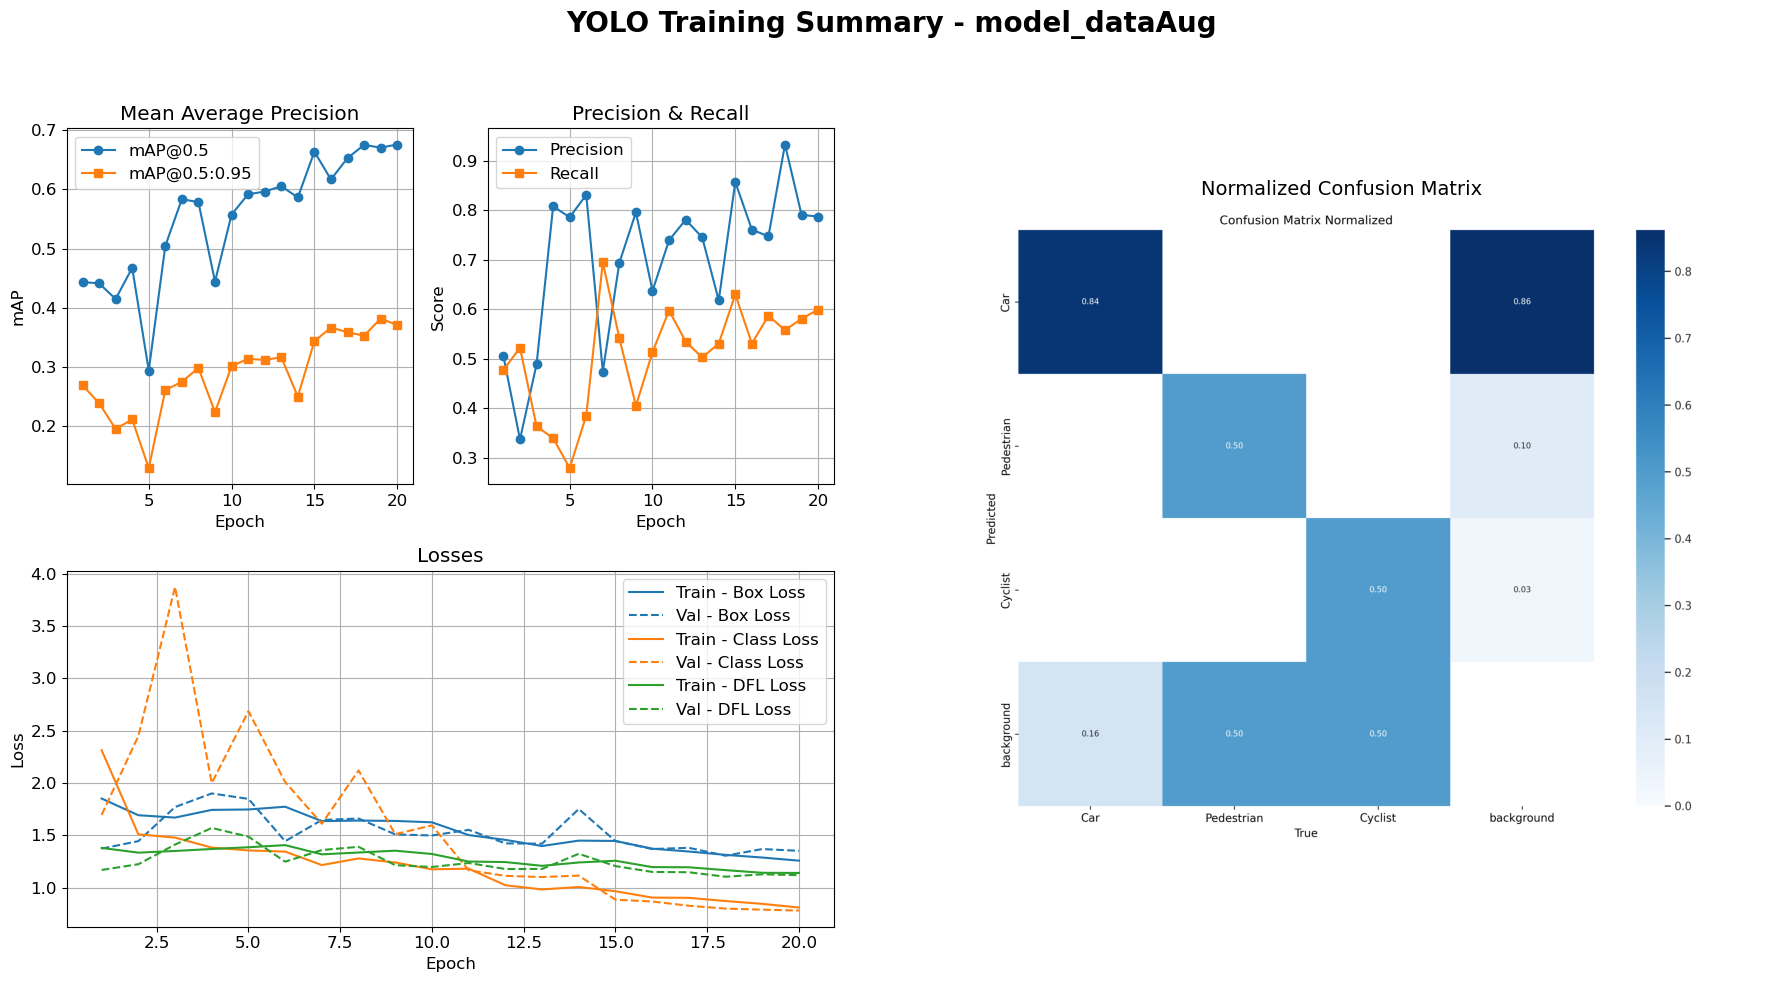

In [20]:
plot_results(results_dataAug.save_dir)

Let's try to use a smaller models with the same configuration as the last one

In [ ]:
model_smaller = YOLO("yolo11s.pt")

results_smaller = model_smaller.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,

    # data augmentation parameters
    hsv_h=0.1,
    hsv_s=0.9,
    hsv_v=0.5,
    perspective=0.001,
    mixup=0.2,
    translate=0.2,
    degrees=10,
    
    imgsz=640,
    project=os.path.join(HOME, "runs"),
    name="model_smaller",
    exist_ok=True,
)

New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=model_smaller, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, ha

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.24G      2.015      3.194      1.444        169        640: 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]

                   all         30        128      0.755      0.411      0.468       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.38G      1.657      1.439      1.282        173        640: 100%|██████████| 15/15 [00:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all         30        128      0.417      0.516      0.508      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.42G      1.663      1.395      1.299        193        640: 100%|██████████| 15/15 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all         30        128      0.516      0.521      0.485      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.42G      1.603      1.272      1.272        188        640: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all         30        128      0.677      0.608      0.601      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.42G      1.605      1.238      1.263        158        640: 100%|██████████| 15/15 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all         30        128      0.773      0.447      0.482      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.42G      1.628      1.208      1.274        156        640: 100%|██████████| 15/15 [00:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all         30        128      0.476      0.459      0.434      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.42G      1.592      1.194      1.247        218        640: 100%|██████████| 15/15 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all         30        128      0.534      0.447      0.492      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.42G      1.596        1.2      1.263        208        640: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.79it/s]

                   all         30        128      0.519      0.561      0.548       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.42G      1.581      1.204       1.27        117        640: 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all         30        128       0.51      0.623      0.545      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.42G       1.54        1.1      1.241        230        640: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all         30        128      0.771      0.608      0.577      0.289


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.42G      1.437      1.073      1.177         67        640: 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all         30        128      0.764      0.587      0.603      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.42G      1.403      1.019      1.171         96        640: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]

                   all         30        128      0.798      0.565      0.596      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.42G      1.394     0.9992      1.166         93        640: 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all         30        128      0.801      0.597      0.594      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.42G      1.401     0.9423      1.165         87        640: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all         30        128      0.783      0.489      0.589      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.42G      1.354     0.9216      1.148         82        640: 100%|██████████| 15/15 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         30        128      0.708      0.551      0.573      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.42G       1.32     0.9087      1.122         54        640: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all         30        128      0.612      0.524      0.626      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.42G      1.322      0.868      1.133         77        640: 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all         30        128      0.766      0.586      0.653      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.42G      1.247     0.8323      1.091         82        640: 100%|██████████| 15/15 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all         30        128      0.673        0.6      0.669      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.42G      1.264     0.8339      1.109         74        640: 100%|██████████| 15/15 [00:02<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all         30        128      0.685      0.602      0.678      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.42G      1.216     0.8051      1.074         83        640: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all         30        128       0.73      0.583      0.683      0.384



20 epochs completed in 0.018 hours.
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller/weights/last.pt, 19.1MB
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller/weights/best.pt, 19.1MB

Validating /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]


                   all         30        128      0.729      0.582      0.683      0.385
                   Car         26        108        0.9      0.787       0.88       0.55
            Pedestrian          7         16      0.786       0.46      0.564      0.307
               Cyclist          3          4        0.5        0.5      0.604      0.299
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller


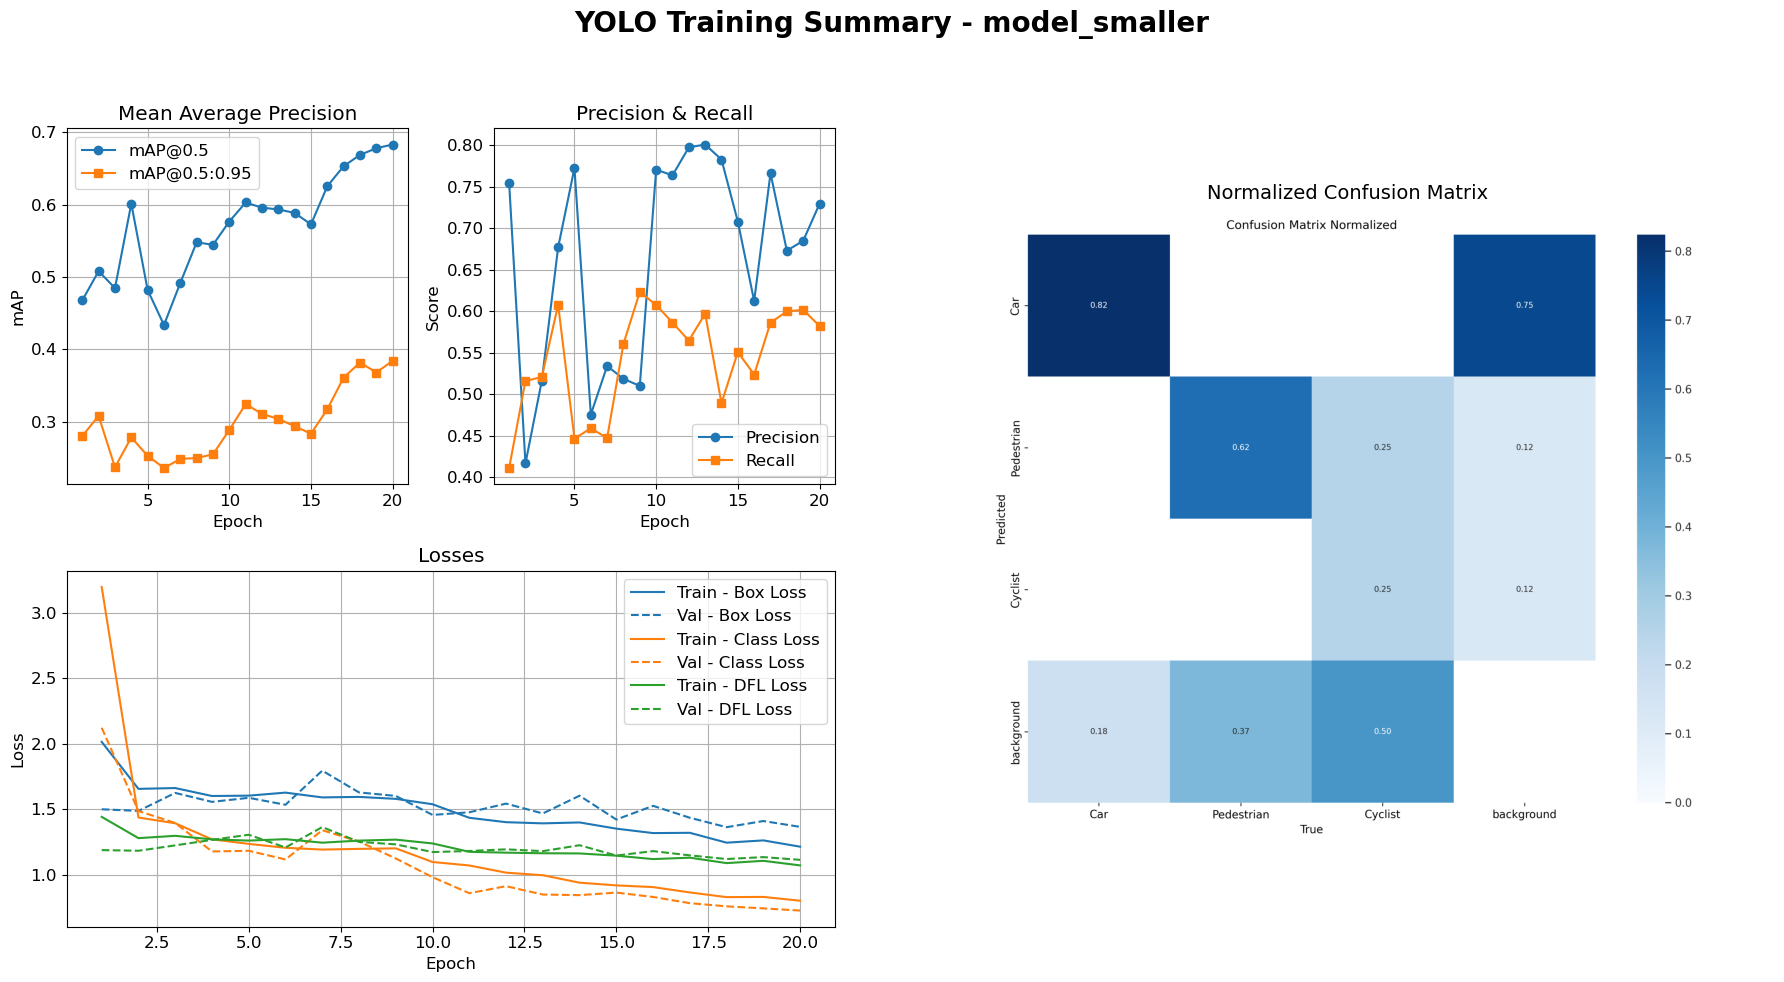

In [26]:
plot_results(results_smaller.save_dir)

In [28]:
model_smaller_2 = YOLO("yolo11s.pt")

results_smaller_2 = model_smaller_2.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,
    imgsz=640,
    project=os.path.join(HOME, "runs"),
    name="model_smaller_2",
    exist_ok=True,
)

New https://pypi.org/project/ultralytics/8.3.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=model_smaller_2, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, 

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/model_smaller_2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.49G      1.527      3.045      1.189        134        640: 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]

                   all         30        128      0.755      0.456      0.454        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.49G      1.357      1.224      1.101        151        640: 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all         30        128      0.425        0.6      0.456      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.49G       1.35      1.198       1.11        160        640:  73%|███████▎  | 11/15 [00:02<00:00,  5.29it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3b7f1940>
Traceback (most recent call last):
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3b7f1940>
Traceback (most recent call last):
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.

                   all         30        128      0.441      0.524       0.47      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.49G      1.299      1.024      1.082        148        640: 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all         30        128        0.5      0.567      0.572      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.61G      1.261     0.9705      1.079        231        640:  27%|██▋       | 4/15 [00:00<00:02,  5.38it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3b7f1940>
Traceback (most recent call last):
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3b7f1940>
Traceback (most recent call last):
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.1

                   all         30        128      0.678        0.5      0.549      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.61G      1.275     0.9571      1.085        144        640: 100%|██████████| 15/15 [00:02<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         30        128      0.867      0.448      0.614      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.61G      1.266     0.8772      1.052        164        640:  33%|███▎      | 5/15 [00:00<00:01,  5.39it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3b7f1940>
Traceback (most recent call last):
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1618, in __del__
       7/20      5.61G      1.272     0.8916      1.053        173        640:  40%|████      | 6/15 [00:01<00:01,  5.24it/s]self._shutdown_workers()
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/site-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  File "/home/filippoquadri/miniconda3/envs/dlav/lib/python3.13/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__d

                   all         30        128      0.545      0.646      0.637      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.61G      1.263     0.8744      1.111        168        640:  13%|█▎        | 2/15 [00:00<00:02,  4.70it/s]


KeyboardInterrupt: 

In [ ]:
plot_results(model_smaller_2.save_dir)

Let's do a final test with a slightly bigger model, with a small learning rate and a lot of data augmentation

In [ ]:
# Load your pretrained model
model_smallLR_DataAug = YOLO("yolo11m.pt")  # Replace with your path if needed

# # Fine-tune with custom training settings
results_smallLR_DataAug = model_smallLR_DataAug.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=EPOCHS,
    imgsz=640,
    device=0,                      # or "cpu" if no GPU
    batch=10,
    optimizer="AdamW",              # Adam optimizer
    lr0=1e-4,                      # initial learning rate
    lrf=0.1,                       # final learning rate fraction
    box=7.5,                       # box loss gain
    cls=0.5,                       # class loss gain
    dfl=1.5,                       # dfl loss gain
    hsv_h=0.030, hsv_s=0.8, hsv_v=0.5,  # color augmentation
    degrees=50,                  # rotation
    translate=0.1,                # translation
    scale=0.5,                    # scale jitter
    shear=0.2,
    perspective=0.0005,
    flipud=0.2, fliplr=0.5,       # flipping
    mosaic=1.0, mixup=0.1,        # advanced augmentations
    patience=20,                  # early stopping patience
    project="runs",               # output directory
    name="model_smallLR_DataAug",
    exist_ok=True
)


New https://pypi.org/project/ultralytics/8.3.106 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=20, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs, name=model_smallLR_DataAug, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to runs/model_smallLR_DataAug/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/model_smallLR_DataAug
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.27G      2.288      2.805      1.805         91        640: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.23it/s]

                   all         30        128      0.755      0.279      0.283     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.33G      1.886      1.724      1.487         61        640: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.90it/s]

                   all         30        128      0.903      0.378      0.404      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.43G       1.77      1.493      1.415         52        640: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.66it/s]

                   all         30        128      0.775      0.412      0.487      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.43G      1.701      1.421      1.423         92        640: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.25it/s]

                   all         30        128      0.822      0.424      0.484      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.47G      1.678      1.408      1.379         78        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.74it/s]

                   all         30        128      0.885      0.413       0.49      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.47G      1.676      1.359      1.359        111        640: 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.83it/s]

                   all         30        128      0.846      0.417      0.486      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.47G      1.601      1.224      1.309        115        640: 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.58it/s]

                   all         30        128      0.839      0.429      0.483      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.54G      1.573      1.219      1.306        115        640: 100%|██████████| 30/30 [00:06<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.42it/s]

                   all         30        128      0.863       0.42      0.502       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.54G      1.532      1.183      1.299         67        640: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.60it/s]

                   all         30        128      0.832      0.443      0.585      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.54G      1.489      1.117      1.267         70        640: 100%|██████████| 30/30 [00:06<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.65it/s]

                   all         30        128       0.67      0.596      0.635      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.54G      1.433      1.171       1.23         31        640: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.56it/s]

                   all         30        128      0.741      0.661      0.642      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.54G      1.405      1.123      1.209         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.46it/s]

                   all         30        128      0.799      0.623      0.631      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.54G      1.399      1.071      1.213         63        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.96it/s]

                   all         30        128      0.617      0.597      0.614      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.54G      1.369      1.053      1.209         59        640: 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 17.00it/s]

                   all         30        128      0.809      0.497      0.591      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.54G      1.333      1.025      1.182         43        640: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.17it/s]

                   all         30        128      0.796      0.528      0.587      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.54G      1.343      1.021      1.189         48        640: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.67it/s]

                   all         30        128      0.647      0.577      0.614      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.54G      1.328      1.011      1.173         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.57it/s]

                   all         30        128      0.673      0.528      0.611      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.54G       1.28     0.9731      1.145         45        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.84it/s]

                   all         30        128      0.711      0.611      0.614      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.54G      1.298     0.9475      1.144         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 16.57it/s]

                   all         30        128       0.73      0.602      0.647      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.54G      1.296     0.9749      1.147         37        640: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.60it/s]

                   all         30        128       0.79      0.596      0.647      0.373



20 epochs completed in 0.037 hours.
Optimizer stripped from runs/model_smallLR_DataAug/weights/last.pt, 40.5MB
Optimizer stripped from runs/model_smallLR_DataAug/weights/best.pt, 40.5MB

Validating runs/model_smallLR_DataAug/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]


                   all         30        128      0.793      0.596      0.647      0.374
                   Car         26        108      0.882      0.787      0.875      0.568
            Pedestrian          7         16      0.789        0.5      0.557      0.302
               Cyclist          3          4      0.707        0.5       0.51      0.251
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/model_smallLR_DataAug


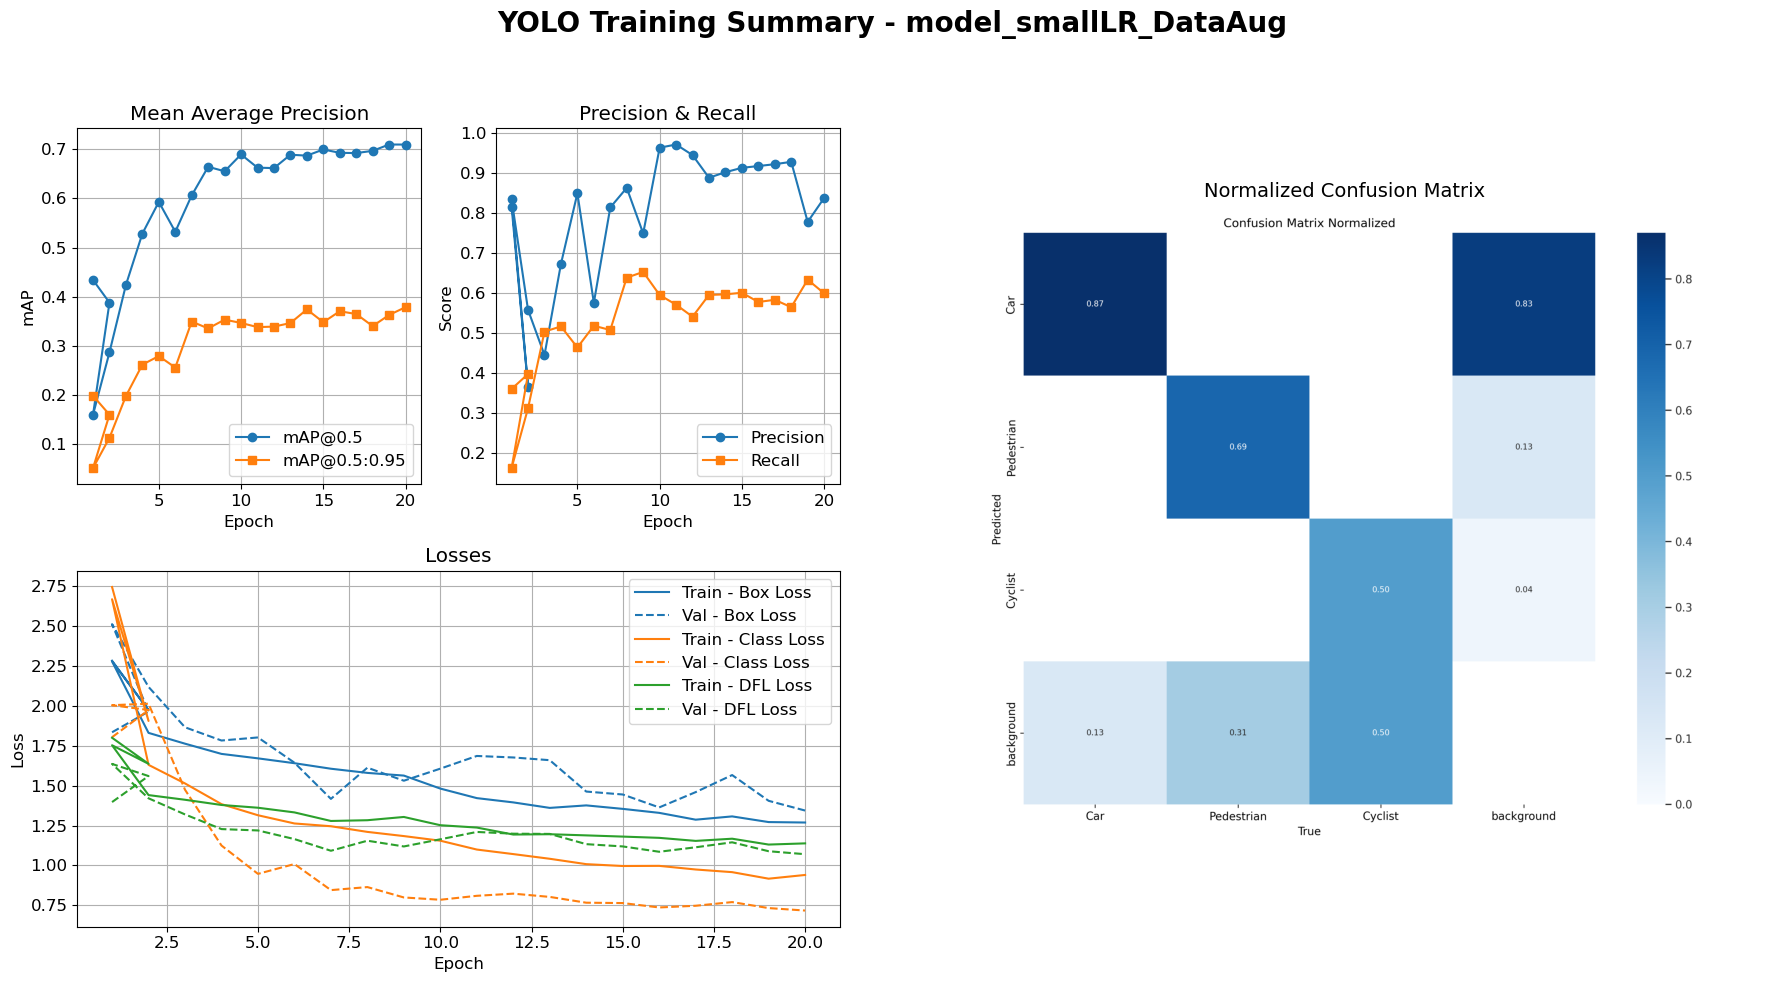

In [26]:
plot_results(results_smallLR_DataAug.save_dir)

In [ ]:
# ---------------------------------------------
# STEP 6: Fine-tune YOLOv11 model
# ---------------------------------------------
#TO-DO: Add the code to fine-tune the YOLOv5 model
# model = YOLO("yolo11n.pt")

# # Train the model
# model.train(data=os.path.join(DATASET_PATH, "data.yaml"), epochs=20, imgsz=640, device="0", batch=6)

# from ultralytics import YOLO
# import os

# # Set up paths
# DATASET_PATH = "/your/full/path/to/dataset"
# DATA_YAML = os.path.join(DATASET_PATH, "data.yaml")

# Load your pretrained model
best_model = YOLO("yolo11s.pt")
result_best_model = best_model.train(
    data=os.path.join(DATASET_PATH, "data.yaml"),
    epochs=100,
    imgsz=640,
    batch=10,
    project=os.path.join(HOME, "runs"),
    name="best_model",
    exist_ok=True,
)


# Inference

After training, visualize the losses andmetrics calculated on the validation set during training.

Additionally, make sure you visualize the confusion matrix to see per-class errors.

For qualitative analysis, run inference on the model, visualise the bouding boxes and visually assess it.

New https://pypi.org/project/ultralytics/8.3.106 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/data.yaml, epochs=5, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs, name=best_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=F

train: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/train.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/labels/val.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.21G      1.497       2.58      1.147        139        640: 100%|██████████| 20/20 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 20.91it/s]

                   all         30        128      0.744      0.418       0.45      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.25G      1.346      1.274      1.116        174        640: 100%|██████████| 20/20 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 24.37it/s]

                   all         30        128      0.341      0.475      0.474       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.32G      1.268      1.039      1.077        103        640: 100%|██████████| 20/20 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 24.71it/s]

                   all         30        128      0.816        0.5      0.597      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.36G      1.268      1.007      1.067        142        640: 100%|██████████| 20/20 [00:02<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 24.52it/s]

                   all         30        128      0.852      0.432      0.492      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.36G      1.228     0.9572      1.059         91        640: 100%|██████████| 20/20 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 24.37it/s]

                   all         30        128      0.556      0.583      0.541      0.327



5 epochs completed in 0.004 hours.
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model/weights/last.pt, 19.1MB
Optimizer stripped from /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model/weights/best.pt, 19.1MB

Validating /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7817MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 22.34it/s]


                   all         30        128      0.817      0.501      0.597      0.341
                   Car         26        108      0.683       0.88      0.833      0.546
            Pedestrian          7         16      0.768      0.623      0.635      0.338
               Cyclist          3          4          1          0      0.324       0.14
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/runs/best_model


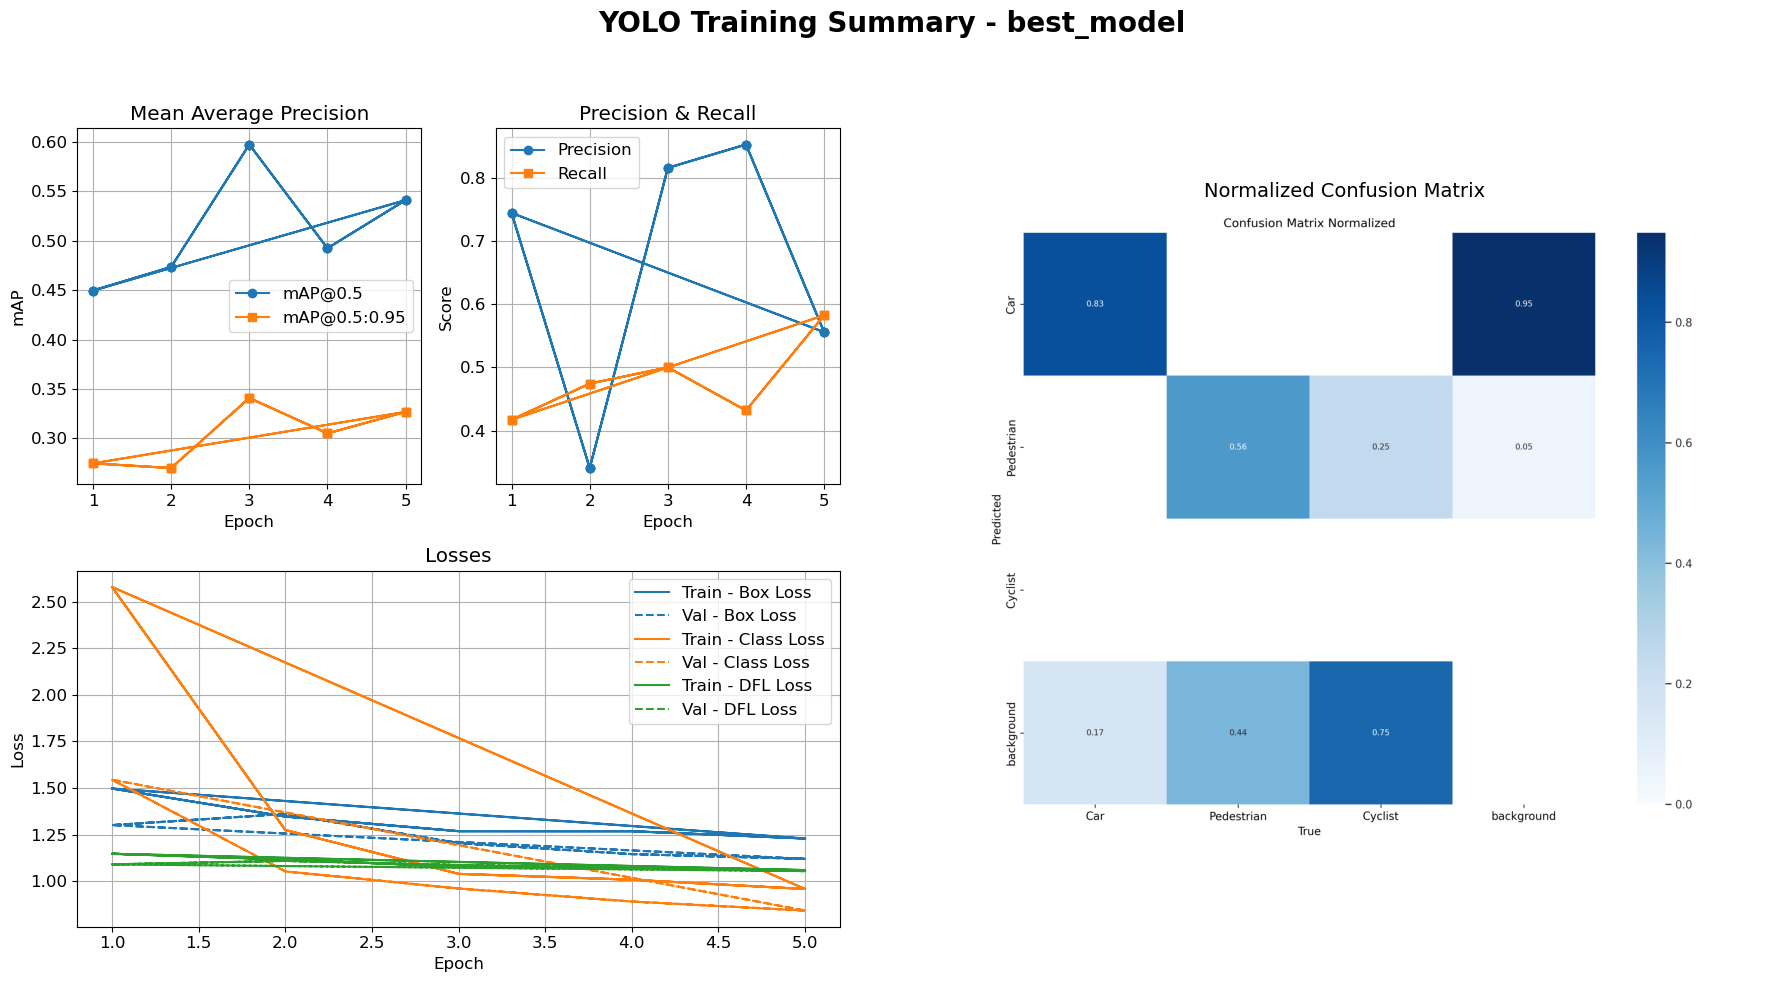

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

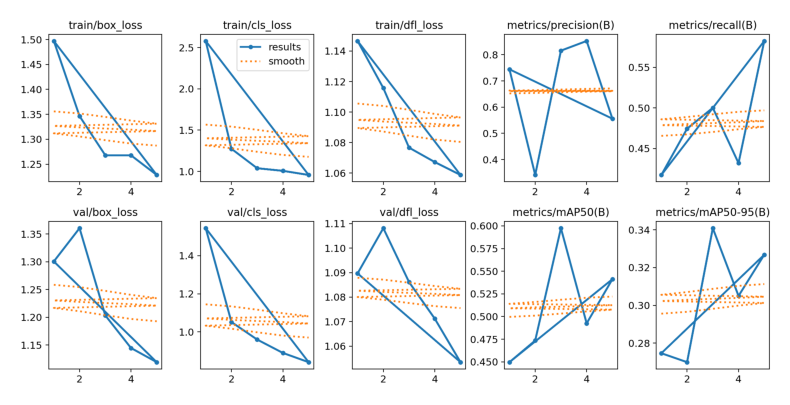

In [ ]:
# -------- VISUALIZE TRAINING LOSSES AND METRICS --------
#TO-DO: Add the code to visualize the training losses and metrics

BEST_MODEL_PATH = result_best_model.save_dir

plot_results(BEST_MODEL_PATH)

# Also show the best model's results image
result_image_path = os.path.join(BEST_MODEL_PATH, "results.png")
# Display the image
img = mpimg.imread(result_image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')


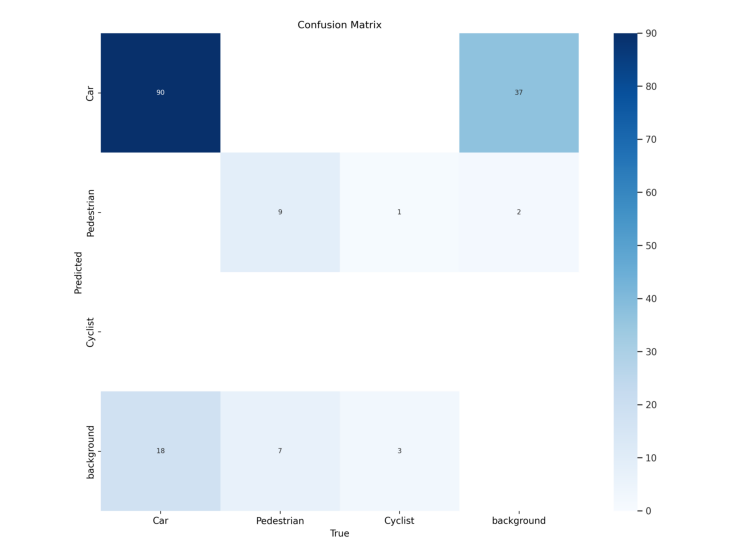

In [ ]:
# ------ VISUALIZE CONFUSION MATRIX --------
#TO-DO: Add the code to visualize the confusion matrix
confusion_matrix_path = os.path.join(BEST_MODEL_PATH, "confusion_matrix.png")
img = mpimg.imread(confusion_matrix_path)

plt.figure(figsize=(15, 7))
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
def show_prediction(image_name, best_model_results_path):
    test_img_path = os.path.join(TEST_IMG, f"{image_name}.png")
    img = cv2.imread(test_img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB
    else:
        print(f"Error: Failed to load image at {test_img_path}")

    # Display the first image with annotations (from best_model_results_path)
    result_img_path = os.path.join(best_model_results_path, f"{image_name}.jpg")
    result_img = cv2.imread(result_img_path)

    if result_img is not None:
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB
    else:
        print(f"Error: Failed to load image at {result_img_path}")

    # Create subplots for side-by-side display
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the test image
    axes[0].imshow(img)
    axes[0].axis('off')  # Hide axes
    axes[0].set_title("Original Image")

    # Plot the result image with annotations
    axes[1].imshow(result_img)
    axes[1].axis('off')  # Hide axes
    axes[1].set_title("Best Model Predictions")

    # Show the images
    plt.tight_layout()
    plt.show()
    


image 1/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/000735.png: 224x640 4 Cars, 4.8ms
image 2/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/000797.png: 224x640 1 Car, 4.6ms
image 3/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/001002.png: 224x640 7 Cars, 4.5ms
image 4/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/001068.png: 224x640 1 Car, 6 Pedestrians, 4.6ms
image 5/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/001756.png: 224x640 1 Car, 4.5ms
image 6/30 /home/filippoquadri/Nextcloud/EPFL/MA4/Deep Learning/DLAV-2025/graded_homework/hw2/datasets/kitti_subset/images/test/001860.png: 224x640 7 Cars, 4.7ms
image 7/30 /hom

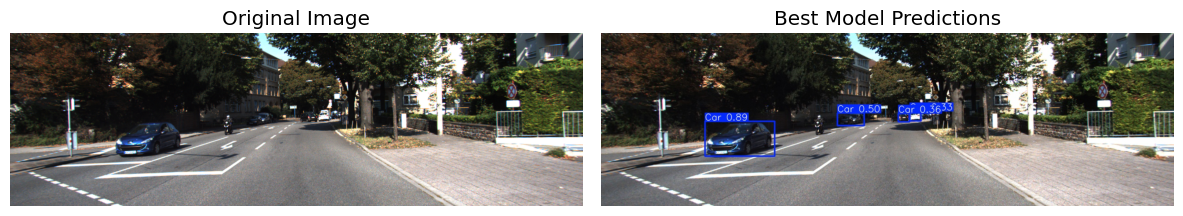

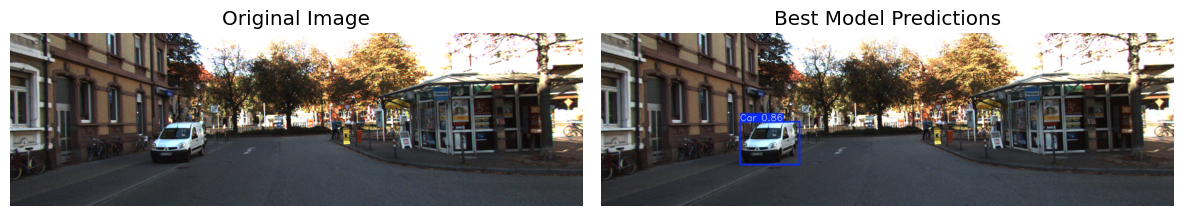

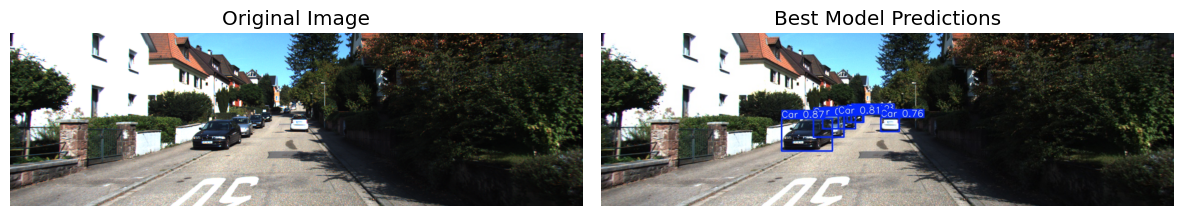

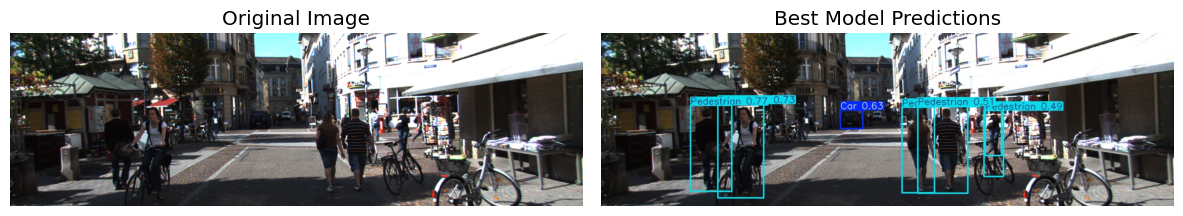

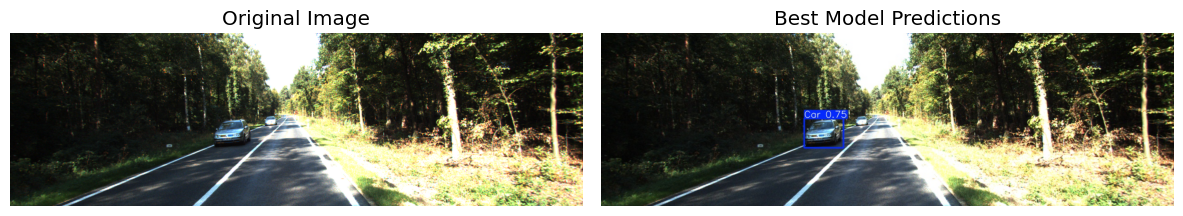

In [20]:
# # -------- RUN INFERENCE AND PLOT SAMPLE OUTPUTS --------
best_model_results = best_model.predict(source=TEST_IMG, save=True, project=os.path.join(HOME, "runs"), name="best_model_results")

# Show the first 5 images with predictions
for i in range(5):
    image_name = os.path.basename(best_model_results[i].path).split(".")[0]
    show_prediction(image_name, os.path.join(HOME, "runs", "best_model_results"))



## Question

Comment on the performance of the model based on the visualizations you made and discuss the inference speed versus performance for YOLO on the driving datasets. Do you think we can use YOLO online on autonomous cars? 

## Ans

<span style="color: red">What we can see is that the model performs not so bad on...</span>

An interesting observation can be made regarding inference speed. Of course, as model complexity increases (more parameters and so higher computational requirements), the inference speed tends to decrease. However, this trade-off often results in improved accuracy. As shown in the [YOLOv11 Pretrained Models Summary Table](https://docs.ultralytics.com/models/yolo11/#performance-metrics), larger models generally performs better but, at the same time, they are slower.

| Model    | Size (pixels) | mAPval 50-95 | Speed CPU ONNX (ms) | Speed T4 TensorRT10 (ms) | Params (M) | FLOPs (B) |
|----------|----------------|--------------|----------------------|---------------------------|------------|-----------|
| YOLO11n  | 640            | 39.5         | 56.1 ± 0.8           | 1.5 ± 0.0                 | 2.6        | 6.5       |
| YOLO11s  | 640            | 47.0         | 90.0 ± 1.2           | 2.5 ± 0.0                 | 9.4        | 21.5      |
| YOLO11m  | 640            | 51.5         | 183.2 ± 2.0          | 4.7 ± 0.1                 | 20.1       | 68.0      |
| YOLO11l  | 640            | 53.4         | 238.6 ± 1.4          | 6.2 ± 0.1                 | 25.3       | 86.9      |
| YOLO11x  | 640            | 54.7         | 462.8 ± 6.7          | 11.3 ± 0.2                | 56.9       | 194.9     |

So, could YOLOv11 be used in autonomous driving? The answer is probably yes. Human reaction time is typically in the range of a few hundred milliseconds. Looking at the table, those models, even when running on a CPU, the inference times are relatively fast. On a GPU, these times drop significantly, making real-time applications more feasible.

That said, a few important considerations remain. First, we don't always know the exact hardware where the model will be deployed. Edge devices, for example, may struggle to achieve these speeds. In those cases, specialized hardware accelerators hosted on FPGAs can help to boost performance.

Furthermore, this analysis only considers object detection. All the decision-making steps are not yet counted, as well as the delay to transfer the data from the camera to the model.

In summary, YOLOv11 models offer a very good compromise of accuracy and speed, making them strong candidates to be used in autonomous vehicles (if the hardware can support them).